In [113]:
from sklearn.datasets     import load_iris
from sklearn.linear_model import Perceptron,SGDClassifier
from sklearn.preprocessing import (
    StandardScaler
)
from sklearn.model_selection import (
    train_test_split
)
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error
from sklearn.base    import TransformerMixin

In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

### Metricas
Serve para avialiar o meu modelos nas predições

#### Acuracia

In [7]:
def PorcentagemDePredicõesErradas(ytrue, prediction):
    return ((ytrue != prediction).sum()) / np.size(ytrue, axis=0)

def PorcentagemDePredicõesCertas(ytrue, prediction):
    return ((ytrue == prediction).sum()) / np.size(ytrue, axis=0)

&nbsp;

### Selecionado dados de test e treino

In [8]:
X ,y = load_iris(return_X_y=True)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X[:,[2,3]], y, test_size=0.3, random_state=1, stratify=y)

In [10]:
np.unique(y)

array([0, 1, 2])

Estratificado : retorna a mesma proporcao de classes \
Com dados para test com o 30%

In [11]:
mY = np.size(y,axis=0)
print('30% de 50 = ',0.3*mY)
print(F'{0.3*mY}/3 = {(0.3*mY)/3}')

30% de 50 =  45.0
45.0/3 = 15.0


70% DE dados para train

In [12]:
mY = np.size(y,axis=0)
print('70% de 50 = ',0.7*mY)
print(F'{0.7*mY}/3 = {(0.7*mY)/3}')

70% de 50 =  105.0
105.0/3 = 35.0


In [13]:
print('Proporcao de classes :',[ (i/np.sum(np.bincount(y))) for i in np.bincount(y) ])
print("Quantidade da classe 1 2 3 para train:",np.bincount(ytrain))
print("Quantidade da classe 1 2 3 para test :",np.bincount(ytest))
print('Mantendo a mesma proporcao de classes')

Proporcao de classes : [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Quantidade da classe 1 2 3 para train: [35 35 35]
Quantidade da classe 1 2 3 para test : [15 15 15]
Mantendo a mesma proporcao de classes


#### Padronizacao


In [14]:
class Padronizacao(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return (X - np.mean(X))/np.std(X)

In [15]:
xtrain = Padronizacao().fit_transform(xtrain)
xtest  = Padronizacao().fit_transform(xtest)

### Perceptron

In [16]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(xtrain,ytrain)

Perceptron(eta0=0.1, random_state=1)

In [17]:
predPpn = ppn.predict(xtest)

In [18]:
PorcentagemDePredicõesErradas(ytest,predPpn)

0.06666666666666667

In [19]:
PorcentagemDePredicõesCertas(ytest,predPpn)

0.9333333333333333

In [20]:
confusion_matrix(ytest,predPpn)

array([[15,  0,  0],
       [ 2, 12,  1],
       [ 0,  0, 15]])

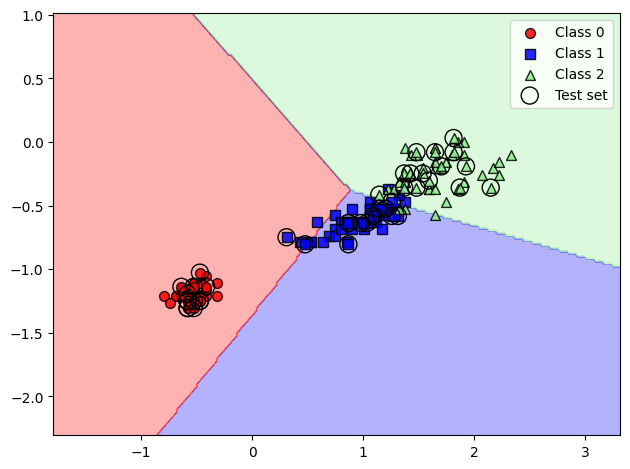

In [21]:
from plots.PlotRegiaDeDecisao import plotDecisionRegion2

plotDecisionRegion2(np.vstack((xtrain,xtest)), np.hstack((ytrain,ytest)), ppn, testIndex=range(105,150))


&nbsp;

### Regularização

In [119]:
from sklearn.datasets import make_classification
X ,y = make_classification(n_samples=1_000,n_features=4,random_state=32)
X = StandardScaler().fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

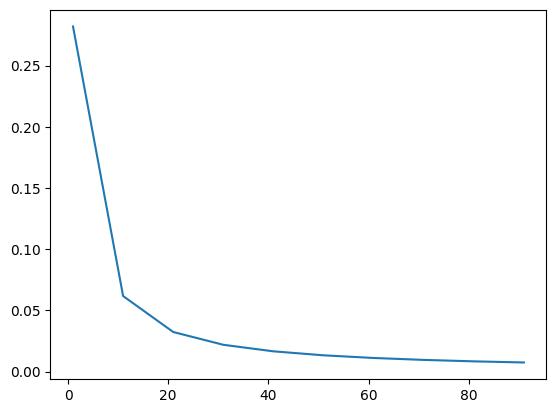

0.00746399195183849


In [131]:
yplot = []
xplot = np.arange(1,100,10)
for l2 in xplot:
    logistic = SGDClassifier(alpha=l2,penalty='l2')
    logistic.fit(xtrain,ytrain)
    yplot.append(logistic.coef_[0][1])
plt.plot(xplot,yplot)
plt.show()
print(min(yplot))

> Quando o valor do termo L2 for muito alto ele se aproxima de 0